In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation()

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/09251.png


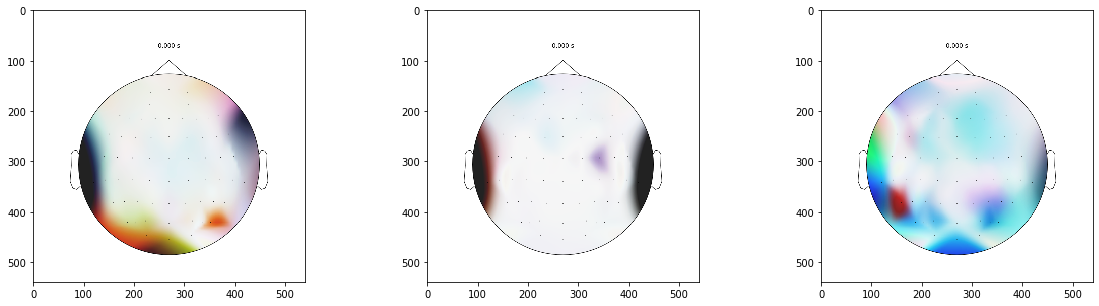

In [3]:
h.plot_examples()

In [4]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(32, (5,5), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
    model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Conv2D(128, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [5]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [6]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

In [7]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_2')

Model: "cnn_topomap_classification_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
dropout (Dropout)            (No

In [8]:
r = model.fit_generator(train_it, epochs=40, callbacks=[tb_log], validation_data=validation_it)

Epoch 1/40
173/173 [==============================] - 101s 587ms/step - loss: 1.0630 - accuracy: 0.4156 - val_loss: 0.9749 - val_accuracy: 0.5317
Epoch 2/40
173/173 [==============================] - 96s 556ms/step - loss: 0.8946 - accuracy: 0.5726 - val_loss: 0.7954 - val_accuracy: 0.6438
Epoch 3/40
173/173 [==============================] - 100s 576ms/step - loss: 0.7499 - accuracy: 0.6614 - val_loss: 0.6482 - val_accuracy: 0.7276
Epoch 4/40
173/173 [==============================] - 97s 562ms/step - loss: 0.6546 - accuracy: 0.7100 - val_loss: 0.5816 - val_accuracy: 0.7584
Epoch 5/40
173/173 [==============================] - 97s 563ms/step - loss: 0.5900 - accuracy: 0.7403 - val_loss: 0.5098 - val_accuracy: 0.7816
Epoch 6/40
173/173 [==============================] - 96s 555ms/step - loss: 0.5465 - accuracy: 0.7639 - val_loss: 0.4943 - val_accuracy: 0.7994
Epoch 7/40
173/173 [==============================] - 96s 556ms/step - loss: 0.5039 - accuracy: 0.7854 - val_loss: 0.4396 - val_

In [9]:
evaluate = model.evaluate_generator(test_it)

In [10]:
y_prob = model.predict_generator(test_it)

In [11]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_2')

model saved, path: models/cnn_topomap_classification_model_2.h5


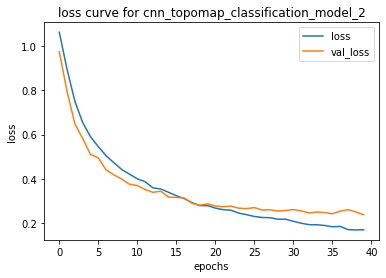

In [12]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_2')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_2.png')

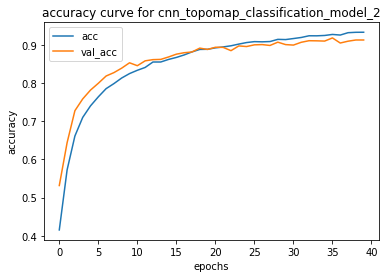

In [13]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_2')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_2.png')